In [4]:
import pandas as pd

book_url = pd.read_csv(r'./Goodreads.csv')

book_url.head(3)

# book_url.to_json("books.json", orient="records")

,ID,Title,Author,Fiction,Genre,Gender,Origin,Language,Pages,Year Published,Centuries,Nobel Prize,Avg_rating,Num_rating,Num_reviews,textblob_sentiment,vader_sentiment,URL
0,1,1984,George Orwell,Fiction,Dystopian,male,UK,English,368,1949,20th,NaN,4.19,4795158,124200,0.142063,0.8847,https://www.goodreads.com/book/show/61439040-1...
1,2,100 Headlines That Changed the World,James Maloney,Non-fiction,History,male,UK,English,309,2012,21st,NaN,3.57,141,23,0.173077,0.6115,https://www.goodreads.com/book/show/14567468-1...
2,3,20 Principles,Hassan Al Banna,Non-fiction,Faith,male,Egypt,Arabic,200,1940,20th,NaN,4.35,37,3,0.228333,0.9349,https://www.goodreads.com/book/show/8594271-us...


In [5]:
book_url.columns

Index(['ID', 'Title', 'Author', 'Fiction', 'Genre', 'Gender', 'Origin',
       'Language', 'Pages', 'Year Published', 'Centuries', 'Nobel Prize',
       'Avg_rating', 'Num_rating', 'Num_reviews', 'textblob_sentiment',
       'vader_sentiment', 'URL'],
      dtype='object')

# TESTING - GOODREADS

- I was not sure if this would work but I tried scraping summaries from 2 books and it worked!

In [6]:
import requests
from bs4 import BeautifulSoup

# Function to scrape the summary from Goodreads
def get_goodreads_summary(url):
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the summary element
        summary = soup.find('div', class_='DetailsLayoutRightParagraph__widthConstrained')
        
        # If summary is found, return it
        if summary:
            return summary.text.strip()
        else:
            return "Summary not found."
    else:
        return "Failed to retrieve the page."

# Example usage
url = 'https://www.goodreads.com/book/show/23129659-adult-children-of-emotionally-immature-parents'
summary = get_goodreads_summary(url)
print(summary)


If you grew up with an emotionally immature, unavailable, or selfish parent, you may have lingering feelings of anger, loneliness, betrayal, or abandonment. You may recall your childhood as a time when your emotional needs were not met, when your feelings were dismissed, or when you took on adult levels of responsibility in an effort to compensate for your parent’s behavior. These wounds can be healed, and you can move forward in your life.In this breakthrough book, clinical psychologist Lindsay Gibson exposes the destructive nature of parents who are emotionally immature or unavailable. You will see how these parents create a sense of neglect, and discover ways to heal from the pain and confusion caused by your childhood. By freeing yourself from your parents’ emotional immaturity, you can recover your true nature, control how you react to them, and avoid disappointment. Finally, you’ll learn how to create positive, new relationships so you can build a better life.Discover the four ty

In [7]:
import requests
from bs4 import BeautifulSoup

# Function to scrape the summary from Goodreads
def get_goodreads_summary(url):
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the summary element
        summary = soup.find('div', class_='DetailsLayoutRightParagraph__widthConstrained')
        
        # If summary is found, return it
        if summary:
            return summary.text.strip()
        else:
            return "Summary not found."
    else:
        return "Failed to retrieve the page."

# Example usage
url = 'https://www.goodreads.com/book/show/22040760-shy'
summary = get_goodreads_summary(url)
print(summary)


It’s a shy word, a timid little word that begs to remain unnoticed. Only three letters long, and it begins with an exhortation to silence. Shhh. There’s no authority in it, no control. It’s a blushing, hunching word; a nervous, knock-kneed, wallflower word. A word for children, not grown-ups, because surely grown-ups grow out of shyness. Don’t they?SIAN PRIOR has maintained a career in the public eye for more than twenty years. For far longer than that she has suffered from excruciating shyness, only partly alleviated by the security she finds with her famous partner Tom. Eventually, after bolting from a party in a state of near-panic, she decides to learn about the science of social anxiety. But soon other questions intrude. About grief, intimacy, self-perception and fear; loss and longing and the consequences of love.Then Tom says he is leaving.Frank, provocative, remarkable in its clarity and beautifully written—Shy is a book you will be thinking and talking about long after you rea

# Scrapign summary of 100 books from Goodreads

**Steps**
1) Create a funciton to scrape the summary from URLs
2) Add new column for summaries
3) Loop through each url
4) Save the updated data frame

**Time taken to scrape 100 books**: 6 mins and a half

# Anomalies

**Books with malay summaries**
- Solution: Translate them to English manually
    1) ANTITHESIS
    2) Islam dalam Sejarah dan Kebudayaan Melayu
    3) Mengemudi Bahtera Perubahan Minda

**Books whose summaries are in foreign languages (idk why this is so funny lol)**
- Solution: Translate them to English manually
    1) F**K It Therapy
    2) Life Lessons From Freud

**Empty summary**
- Solution: Extracts alternative summaries from Google Book 
    1) 20 Principles: Couldnt find one
    2) Mencari Jalan Pulang: Couldn't find one
    3) The Story of Evolution: https://books.google.com.my/books/about/The_Story_of_Evolution.html?id=3yjEDwAAQBAJ&source=kp_book_description&redir_esc=y
    4) Travelog Minda Tajdid: Catatan Perjalanan Dari Tanah Barat: https://books.google.com.my/books/about/Travelog_Minda_Tajdid.html?id=UbEQAgAAQBAJ&redir_esc=y


In [8]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# import json 

# # function to scrape summary from url
# def get_goodreads_summary(url):
#     response = requests.get(url)
    
#     if response.status_code == 200:
#         soup = BeautifulSoup(response.content, 'html.parser')
#         summary = soup.find('div', class_='DetailsLayoutRightParagraph__widthConstrained')
        
#         if summary:
#             return summary.get_text(strip=True)
#         else: 
#             return 'Summary not found.'
    
#     else:
#         return 'Failed to retrieve the page'
    
# #create new column for summary (book_url my dataframe)
# book_url['Summary'] = ''

# # loop through each url and scrape summary
# for index, row in book_url.iterrows():
#     url = row['URL'].strip()
#     book_url.at[index, 'Summary'] = get_goodreads_summary(url)
    
# # #save the updated df to a new csv file
# # book_url[['Title', 'Author', 'URL', 'Summary']].to_csv('book_summaries.csv', index=False)

# Sentiment Analysis

**TYPES:**
- TextBlob
- VADER

**How I do it**
- I run all texblob and VADER analysis and compile them all in 'sentiment_analysis.csv'

In [9]:
book_summary = pd.read_csv('./book_summaries.csv', encoding='latin1')
book_summary.columns

Index(['Title', 'Author', 'URL', 'Summary'], dtype='object')

In [10]:
book_summary.head()

,Title,Author,URL,Summary
0,1984,George Orwell,https://www.goodreads.com/book/show/61439040-1...,A masterpiece of rebellion and imprisonment wh...
1,100 Headlines That Changed the World,James Maloney,https://www.goodreads.com/book/show/14567468-1...,Here are the incredible newspaper headlines th...
2,20 Principles,Hassan Al Banna,https://www.goodreads.com/book/show/8594271-us...,Al-Banna's principles aimed to inspire Muslims...
3,30-Second Psychology,Christian Jarrett,https://www.goodreads.com/book/show/11931275-3...,"Pavlovâs Dogs, Psychoanalysis, Milgramâs O..."
4,30-Second Religion,Russell Re Manning,https://www.goodreads.com/book/show/13124582-3...,Half minute explanations of various world reli...


# Textblob

In [11]:
import pandas as pd
from textblob import TextBlob


#Define a function to calculate sentiment
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

#apply the function to the summary column
book_summary['textblob_sentiment'] = book_summary['Summary'].apply(get_textblob_sentiment)

#create new dataframe 
sentiment_df = book_summary[['Title', 'Author', 'textblob_sentiment']]

# #save df
# sentiment_df.to_csv('sentiment_analysis.csv', index=False)

# VADER

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

#load existing sentiment_analysis.csv file
sentiment_analysis = pd.read_csv('./sentiment_analysis.csv')

#initialize VADER sentiment analyzer 
sia = SentimentIntensityAnalyzer()

#define a function to get sentiment scores
def get_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']

#apply function to summary column
book_summary['vader_sentiment'] = book_summary['Summary'].apply(get_vader_sentiment)

# #save df
# book_summary.to_csv('sentiment_analysis.csv', index=False)

In [13]:
sentiment_analysis.columns

Index(['Title', 'Author', 'URL', 'Summary', 'textblob_sentiment',
       'vader_sentiment'],
      dtype='object')

In [14]:
import plotly.express as px

fig_vader = px.histogram(
    book_summary, x='vader_sentiment', nbins=20, title='Distribution of VADER sentiment scores'
)

fig_vader.update_layout(
    xaxis_title='VADER Sentiment', yaxis_title='Count'
)

fig_vader.show()

In [15]:

# Classify vader_sentiment as Positive, Neutral, or Negative
book_url['Sentiment_Type'] = book_url['vader_sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Count the number of books for each sentiment type
sentiment_counts = book_url['Sentiment_Type'].value_counts().reset_index()

# Rename columns for clarity
sentiment_counts.columns = ['Sentiment', 'Count']

# Visualize the counts using a bar chart
fig = px.bar(sentiment_counts, x='Sentiment', y='Count', title='Sentiment Analysis Count', color='Sentiment')
fig.update_layout(
    width=300,
    height=500,
    template='plotly_dark',
    title_font=dict(size=18, color='yellow')
)
fig.write_html("./charts/sentiment_count.html")
fig.show()


In [32]:
#sentiment analysis comparison - compare VADER sentiment scores for each book
fig = px.bar(book_url, x='vader_sentiment', y='Title',  color='Genre', orientation='h')
fig.update_layout(
    yaxis=dict(showticklabels=False),
    title= 'Sentiment Analysis (Summary) - VADER Scores',
    title_x=0.5,
    title_font=dict(size=20, color='yellow'),
    template='plotly_dark',
    width=570,
    height=530
)
fig.write_html("./charts/sentiment_analysis.html")
fig.show()

# Word cloud

[('life', 51), ('new', 45), ('world', 44), ('history', 31), ('man', 29), ('time', 29), ('human', 27), ('political', 19), ('family', 18), ('evolution', 18), ('love', 17), ('people', 17), ('science', 17), ('questions', 17), ('muslim', 17), ('thought', 16), ('free', 16), ('lives', 16), ('theory', 15), ('modern', 15), ('great', 14), ('ideas', 14), ('economics', 14), ('war', 13), ('power', 13), ('education', 13), ('philosophy', 13), ('journey', 13), ('god', 13), ('others', 13), ('freud', 12), ('culture', 12), ('islam', 12), ('truth', 11), ('explains', 11), ('scientists', 11), ('everything', 11), ('understanding', 11), ('offers', 11), ('live', 11), ('explores', 11), ('major', 11), ('accessible', 11), ('read', 11), ('religion', 11), ('freedom', 10), ('big', 10), ('words', 10), ('society', 10), ('times', 10), ('clear', 10), ('nature', 10), ('belief', 10), ('historical', 10), ('young', 10), ('death', 10), ('economic', 10), ('social', 10), ('women', 10), ('discover', 9), ('past', 9), ('understan

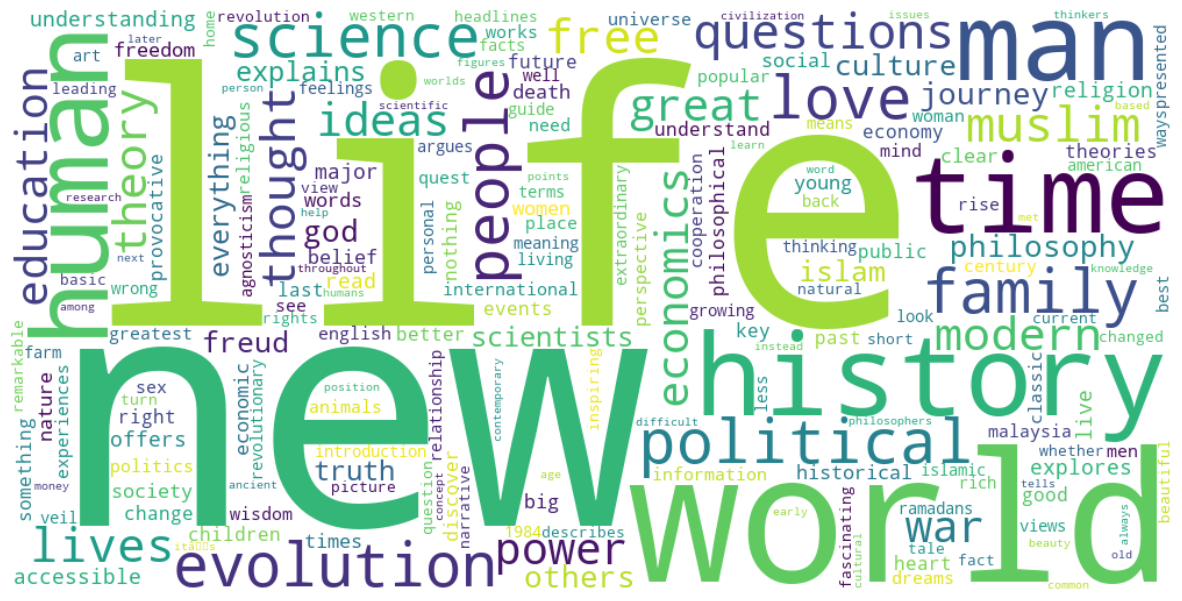

In [17]:
import pandas as pd
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk. tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#custom list of stopwords
custom_stopwords = {
    'one', 'book', 'us', 'book', 'would', 'â', 'stories', 'years', 'many', 'first', 'story', 'work',
    'important', 'way', 'also', 'know', 'become', 'within', 'used', 'two', 'much', 'readers', 
    'dr', 'find', 'without', 'today', 'author', 'books', 'makes', 'even', 'could', 'around', 'like',
    'collection', 'edition', 'make', 'published', 'york', 'ever', 'takes', 'get','never', 'really', 'long',
    'four', 'little', 'series', 'yet', 'including', 'every', 'often', 'account', 'filled', 'still', 'three',
    'shows', 'thomas', 'john', 'cover', 'made', 'behind', 'following', 'ones', 
    }

#combine wiht nltk's defautl stopwords
stop_words = set(stopwords.words('english')).union(custom_stopwords)

#Pre-processing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

#apply pre-processing to summary column and flattern all words into one list
all_words = []
book_summary['Summary'].apply(lambda x:all_words.extend(preprocess_text(x)))

#count word freq 
word_counts = Counter(all_words)

#get the most common words 
most_common_words = word_counts.most_common()

print(most_common_words)

#visualize it
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.savefig('wordcloud.png', format='png')
plt.show()